In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("winequality-white.csv", sep=";")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## 2.1. Exiba a quantidade de amostras existente em cada classe de vinho, onde as classes são representadas por valores inteiros entre 0 e 10.

Text(0, 0.5, 'Quantidade')

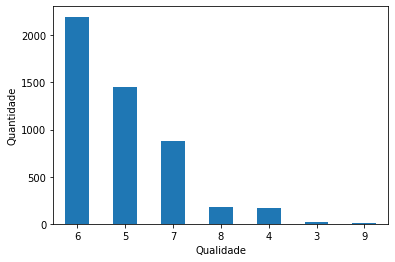

In [4]:
df['quality'].value_counts().plot.bar(rot=0)
plt.xlabel('Qualidade')
plt.ylabel('Quantidade')

## 2.2. Separe 70% dos dados para treino (conjunto de treino) e 30% dos dados para teste (conjunto de teste).

In [5]:
X = df.drop(columns=['quality'], axis=1)
y = df['quality']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

## 2.3. Crie diferentes modelos de classificação de vinho usando o kNN com diferentes valores de k.

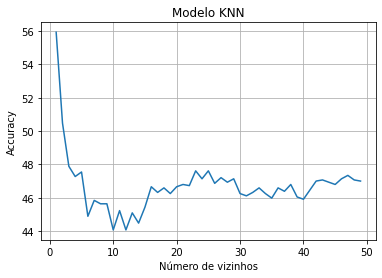

In [7]:
neighbors = np.arange(1, 50)

acc = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    kn = KNeighborsClassifier(n_neighbors=k)
    kn.fit(X_train, y_train)
    y_pred = kn.predict(X_test)
    accuracy = sum(y_pred == y_test)/len(y_test) * 100
    acc[i] = accuracy
    
plt.title('Modelo KNN')
plt.plot(neighbors, acc)
plt.grid()
plt.xlabel('Número de vizinhos')
plt.ylabel('Accuracy')
plt.show()

## Novos testes

In [8]:
# Standartizando os dados
X_minMax = MinMaxScaler().fit_transform(X) 

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_minMax, y, train_size=0.7, random_state=42)

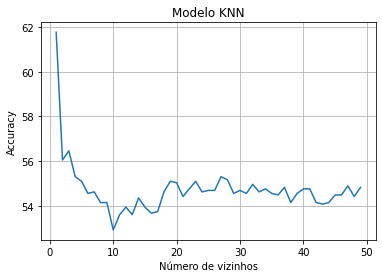

In [10]:
neighbors = np.arange(1, 50)

acc = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    kn = KNeighborsClassifier(n_neighbors=k)
    kn.fit(X_train, y_train)
    y_pred = kn.predict(X_test)
    accuracy = sum(y_pred == y_test)/len(y_test) * 100
    acc[i] = accuracy

plt.title('Modelo KNN')
plt.plot(neighbors, acc)
plt.grid()
plt.xlabel('Número de vizinhos')
plt.ylabel('Accuracy')
plt.show()

## 2.4. Mostre os resultados de acurácia para os modelos criados. Qual o modelo com melhor acurácia?

In [11]:
for k, accuracy in enumerate(acc):
    print(f'k={k+1}  acurácia={accuracy}')

k=1  acurácia=61.7687074829932
k=2  acurácia=56.054421768707485
k=3  acurácia=56.4625850340136
k=4  acurácia=55.306122448979586
k=5  acurácia=55.10204081632652
k=6  acurácia=54.5578231292517
k=7  acurácia=54.625850340136054
k=8  acurácia=54.14965986394557
k=9  acurácia=54.14965986394557
k=10  acurácia=52.925170068027214
k=11  acurácia=53.605442176870746
k=12  acurácia=53.945578231292515
k=13  acurácia=53.605442176870746
k=14  acurácia=54.35374149659864
k=15  acurácia=53.945578231292515
k=16  acurácia=53.673469387755105
k=17  acurácia=53.74149659863946
k=18  acurácia=54.625850340136054
k=19  acurácia=55.10204081632652
k=20  acurácia=55.034013605442176
k=21  acurácia=54.421768707483
k=22  acurácia=54.761904761904766
k=23  acurácia=55.10204081632652
k=24  acurácia=54.625850340136054
k=25  acurácia=54.69387755102041
k=26  acurácia=54.69387755102041
k=27  acurácia=55.306122448979586
k=28  acurácia=55.17006802721088
k=29  acurácia=54.5578231292517
k=30  acurácia=54.69387755102041
k=31  acurá

## O modelo com melhor acurácia é o que k=1